## Importation des données

In [ ]:
# import pandas as pd
# file1 = 'C:/Users/Asus/Desktop/SCHOOL/ML_Project_Files/Datasets/churn-bigml-20.csv'
# file2 = 'C:/Users/Asus/Desktop/SCHOOL/ML_Project_Files/Datasets/churn-bigml-80.csv'
# data1 = pd.read_csv(file1)
# data2 = pd.read_csv(file2)
# merged_data = pd.concat([data1, data2], ignore_index=True)
# output_file = 'C:/Users/Asus/Desktop/SCHOOL/ML_Project_Files/Datasets/merged_data.csv'
# merged_data.to_csv(output_file, index=False)
# print(f"Les données ont été fusionnées et sauvegardées dans : {output_file}")


In [1]:
import pandas as pd
merged_file ='C:/Users/ROYAUME MEDIAS/Downloads/ML_Project_Files/archive (2)/merged_data.csv'
data = pd.read_csv(merged_file)
print(data.head())

ModuleNotFoundError: No module named 'pandas'

In [24]:
print(f"Dimensions : {data.shape}")


Dimensions : (3333, 20)


In [25]:
print(data.describe())

       Account length    Area code  Number vmail messages  Total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.25943

## I. Nettoyage des données

In [26]:
data.isnull().values.any()

False

In [27]:
colonnes = data.columns.tolist()
print(colonnes)

['State', 'Account length', 'Area code', 'International plan', 'Voice mail plan', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'Churn']


## II. Traitement des données
### 1/ Identifier les types de colonnes

In [28]:
original = data.copy()

#Identifier les colonnes binaires
binary_columns = original.columns[original.apply(lambda col: col.dropna().isin([0, 1]).all())]
print("Colonnes binaires :", binary_columns.tolist())

#Identifier les colonnes catégoriques
categorical_columns = original.select_dtypes(include=['object', 'category']).columns
print("Colonnes catégoriques :")
display(categorical_columns.tolist())

#Identifier les colonnes numériques
integer_columns = original.select_dtypes(include=['int', 'float']).columns
print("Colonnes numériques :\n")
display(integer_columns.tolist())


Colonnes binaires : ['Churn']
Colonnes catégoriques :


['State', 'International plan', 'Voice mail plan']

Colonnes numériques :



['Account length',
 'Area code',
 'Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'Customer service calls']

### 2/ Afficher toutes les Features

In [29]:
# Combiner les  colonnes
combined_columns = binary_columns.union(categorical_columns).union(integer_columns)
if 'Churn' in combined_columns:
    combined_columns = combined_columns.drop('Churn')

combined_data = original[combined_columns]
print("Colonnes combinées sans 'Churn' :")
display(combined_data)

Colonnes combinées sans 'Churn' :


,Account length,Area code,Customer service calls,International plan,Number vmail messages,State,Total day calls,Total day charge,Total day minutes,Total eve calls,Total eve charge,Total eve minutes,Total intl calls,Total intl charge,Total intl minutes,Total night calls,Total night charge,Total night minutes,Voice mail plan
0,117,408,1,No,0,LA,97,31.37,184.5,80,29.89,351.6,4,2.35,8.7,90,9.71,215.8,No
1,65,415,4,No,0,IN,137,21.95,129.1,83,19.42,228.5,6,3.43,12.7,111,9.40,208.8,No
2,161,415,4,No,0,NY,67,56.59,332.9,97,27.01,317.8,9,1.46,5.4,128,7.23,160.6,No
3,111,415,2,No,0,SC,103,18.77,110.4,102,11.67,137.3,6,2.08,7.7,105,8.53,189.6,No
4,49,510,1,No,0,HI,117,20.28,119.3,109,18.28,215.1,1,3.00,11.1,90,8.04,178.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,79,415,2,No,0,SC,98,22.90,134.7,68,16.12,189.7,5,3.19,11.8,128,9.96,221.4,No
3329,192,415,2,No,36,AZ,77,26.55,156.2,126,18.32,215.5,6,2.67,9.9,83,12.56,279.1,Yes
3330,68,415,3,No,0,WV,57,39.29,231.1,55,13.04,153.4,4,2.59,9.6,123,8.61,191.3,No
3331,28,510,2,No,0,RI,109,30.74,180.8,58,24.55,288.8,6,3.81,14.1,91,8.64,191.9,No


### 3/ Conversion des données catégoriques

In [30]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])


if data['Churn'].dtype == 'bool' or data['Churn'].nunique() == 2:
    data['Churn'] = data['Churn'].astype(int)
else:
    
    data['Churn'] = label_encoder.fit_transform(data['Churn'])


print("1. Data types après conversion :\n",data.dtypes)
print("\n2. Les données transformés :\n",data.head())


1. Data types après conversion :
 State                       int32
Account length              int64
Area code                   int64
International plan          int32
Voice mail plan             int32
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                       int32
dtype: object

2. Les données transformés :
    State  Account length  Area code  International plan  Voice mail plan  \
0     18             117        408                   0                0   
1     15              65        415                   0                0   
2     34     

### 4/ Séparation des Features et Target après conversion

In [31]:
df = pd.DataFrame(data)
features = df.drop('Churn', axis=1)  
target = df['Churn']
print("Features (X):")
print(features.head())
print("\nTarget (y):")
print(target.head())
print(type(target))


Features (X):
   State  Account length  Area code  International plan  Voice mail plan  \
0     18             117        408                   0                0   
1     15              65        415                   0                0   
2     34             161        415                   0                0   
3     40             111        415                   0                0   
4     11              49        510                   0                0   

   Number vmail messages  Total day minutes  Total day calls  \
0                      0              184.5               97   
1                      0              129.1              137   
2                      0              332.9               67   
3                      0              110.4              103   
4                      0              119.3              117   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             31.37              351.6               80            

### 5/ Données aberrantes :
#### a/ Détéction des données aberrantes :

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

X_numeric = features.select_dtypes(include=['float64', 'int64'])


Q1 = X_numeric.quantile(0.25)
Q3 = X_numeric.quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Les outliers
outliers = ((X_numeric < lower_bound) | (X_numeric > upper_bound)).sum()
print(outliers)

Account length             18
Area code                   0
Number vmail messages       1
Total day minutes          25
Total day calls            23
Total day charge           25
Total eve minutes          24
Total eve calls            20
Total eve charge           24
Total night minutes        30
Total night calls          22
Total night charge         30
Total intl minutes         46
Total intl calls           78
Total intl charge          49
Customer service calls    267
dtype: int64


In [33]:
print(f'Nombre de donneés aberrantes : {outliers.sum()}')

Nombre de donneés aberrantes : 682


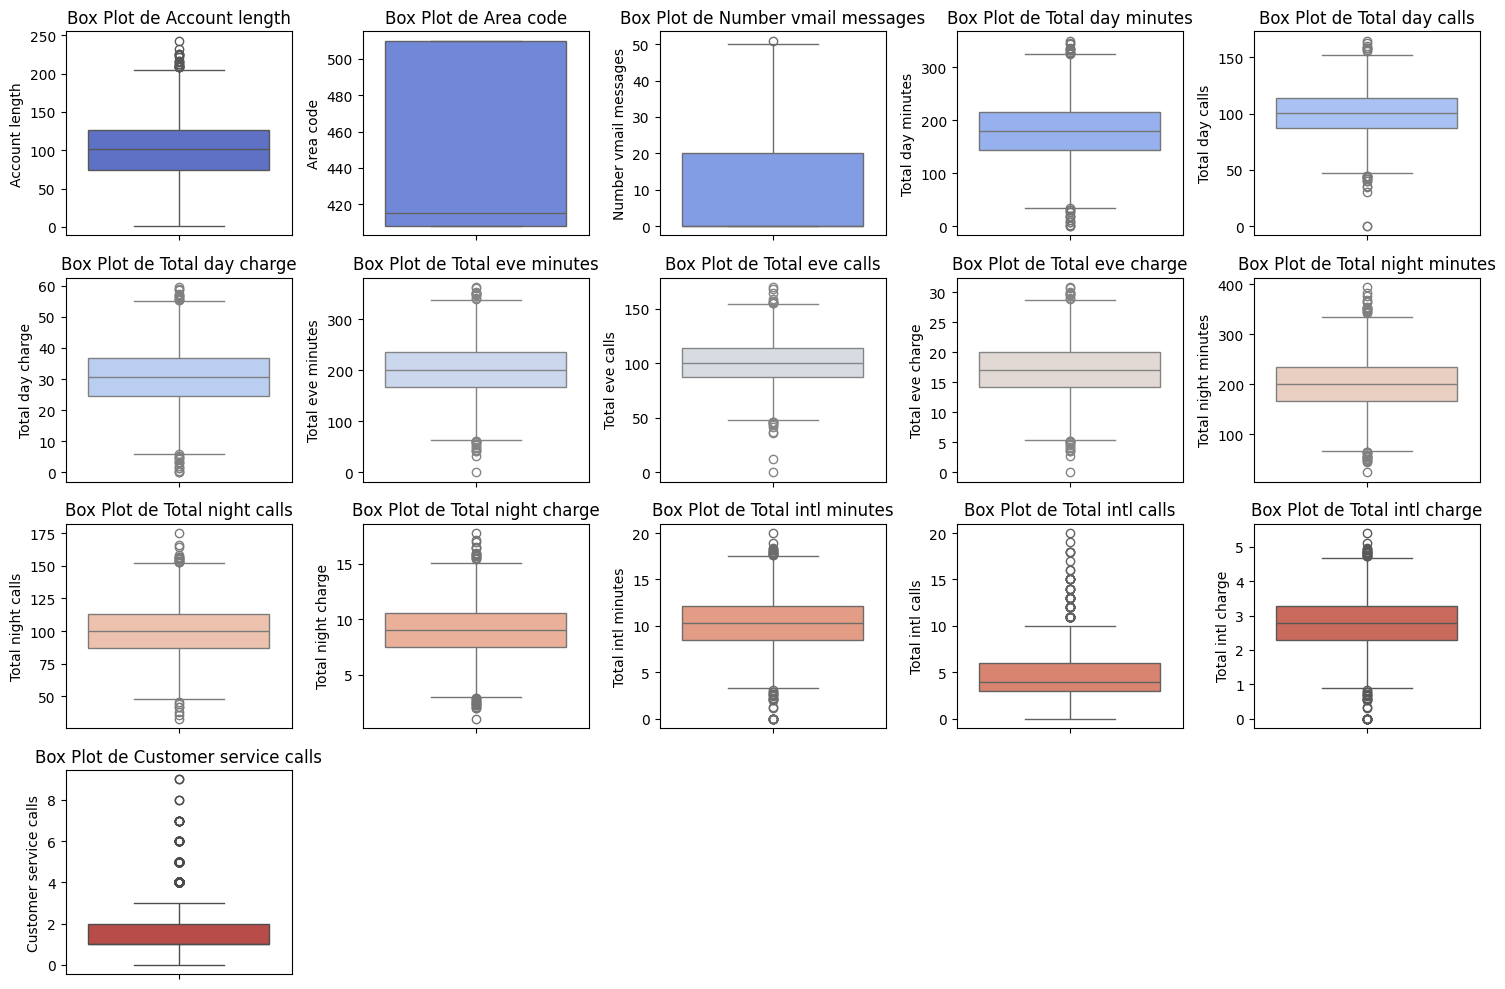

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
colors = sns.color_palette("coolwarm", n_colors=len(X_numeric.columns))  # Nouvelle palette
for i, col in enumerate(X_numeric.columns, 1):
    plt.subplot(4, 5, i)
    sns.boxplot(y=features[col], color=colors[i - 1])  
    plt.title(f'Box Plot de {col}')
    
plt.tight_layout()
plt.show()


#### b/ Traitement des données aberrantes :

In [35]:
def handle_outliers(data, column):
    if data[column].isnull().all():
        print(f"column {column} contains only NaN. Ignorée.")
        return  
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    if IQR == 0:
        print(f"IQR for {column} is 0. Ignorée.")
        return 
    min_value = Q1 - 1.5 * IQR
    max_value = Q3 + 1.5 * IQR
    
    data[column] = data[column].clip(lower=min_value, upper=max_value)


for column in X_numeric:
    handle_outliers(df, column)

#### Boxplots après traitement :

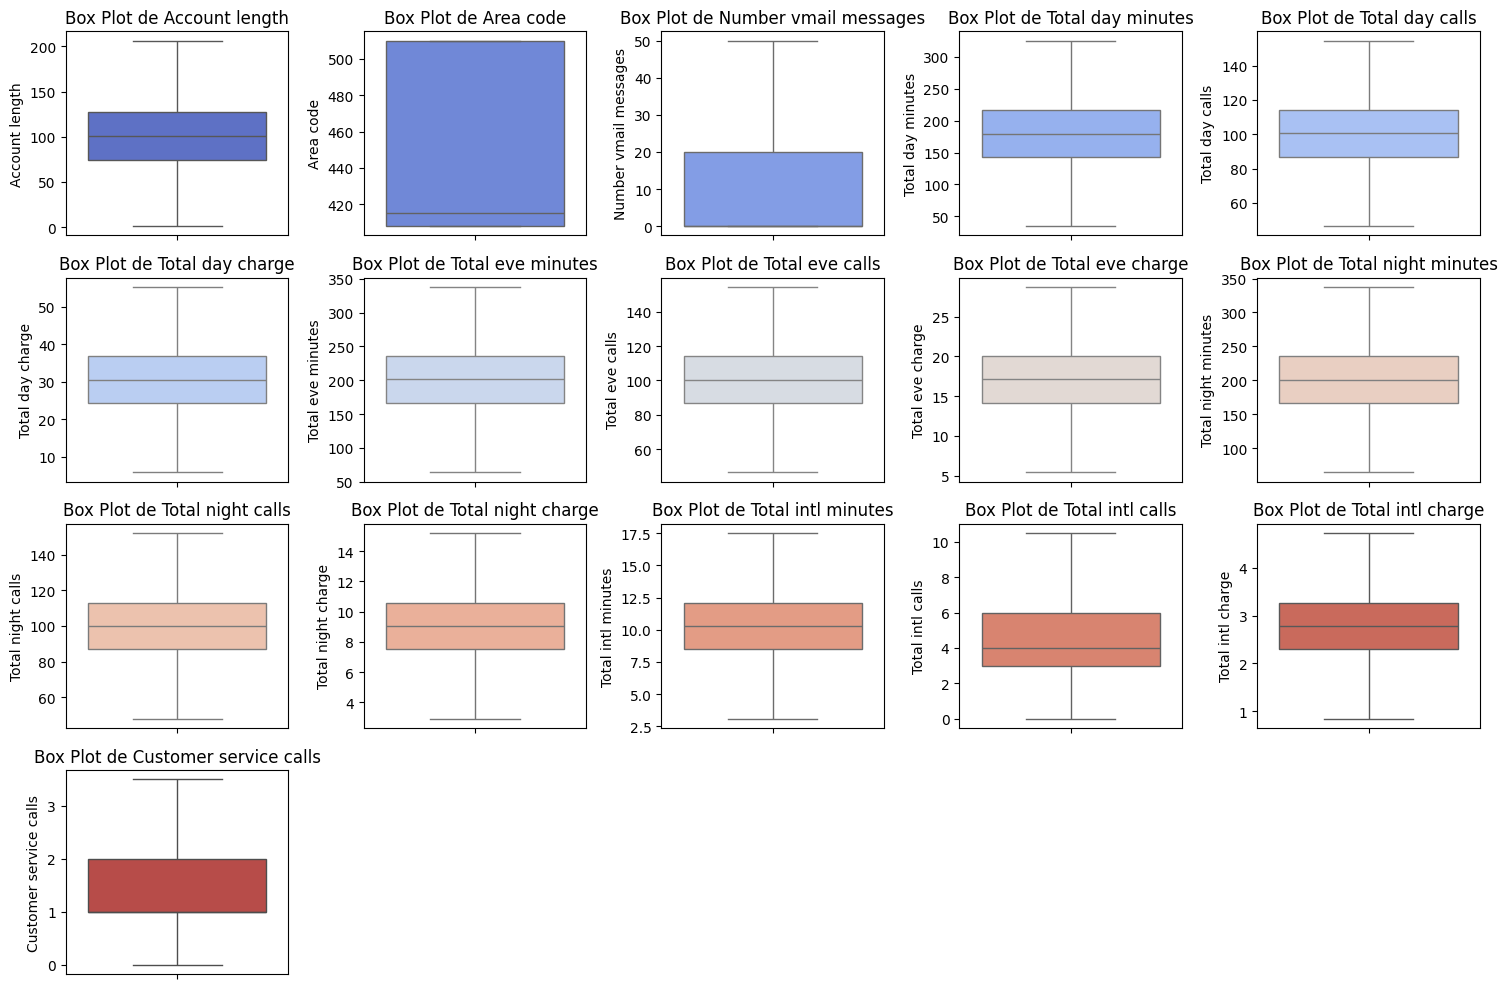

In [36]:
plt.figure(figsize=(15, 10))
colors = sns.color_palette("coolwarm", n_colors=len(X_numeric.columns))  

for i, col in enumerate(X_numeric.columns, 1):
    plt.subplot(4, 5, i)
    sns.boxplot(y=df[col], color=colors[i-1])  
    plt.title(f'Box Plot de {col}')
    
plt.tight_layout()
plt.show()


## III. Visualiser les donnés :
### 1/ Histogrammes pour les colonnes numériques :

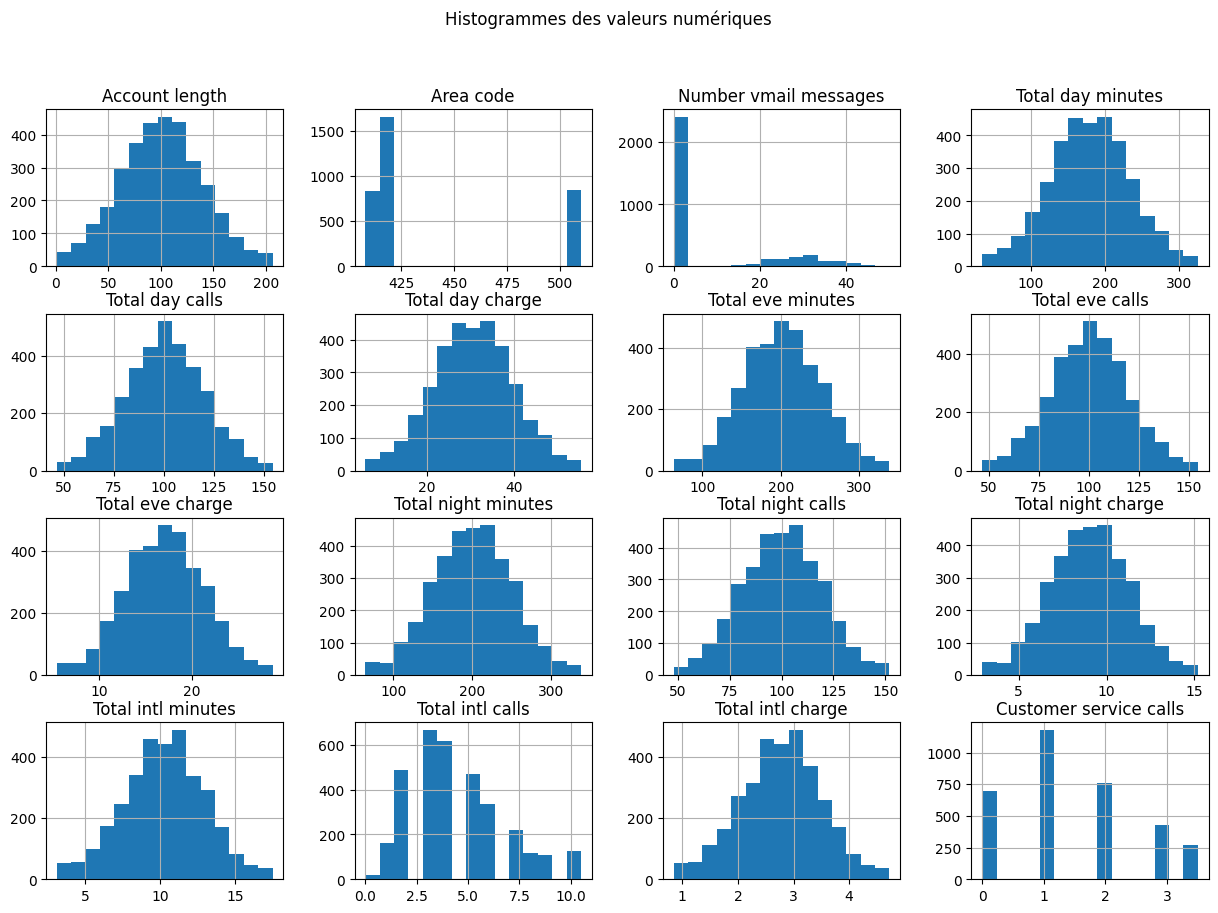

In [37]:
df[integer_columns].hist(bins=15, figsize=(15, 10))
plt.suptitle('Histogrammes des valeurs numériques')
plt.show()

### 2/ Diagrammes de fréquences pour les colonnes catégoriques :

C:\Users\ROYAUME MEDIAS\AppData\Local\Temp\ipykernel_15476\2237084351.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x='Churn', data=data, palette='Reds', ax=axes[0])
C:\Users\ROYAUME MEDIAS\AppData\Local\Temp\ipykernel_15476\2237084351.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x='Voice mail plan', data=data, palette='Blues', ax=axes[1])
C:\Users\ROYAUME MEDIAS\AppData\Local\Temp\ipykernel_15476\2237084351.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x='International plan', data=data, palette='Greens', ax=axes[2])


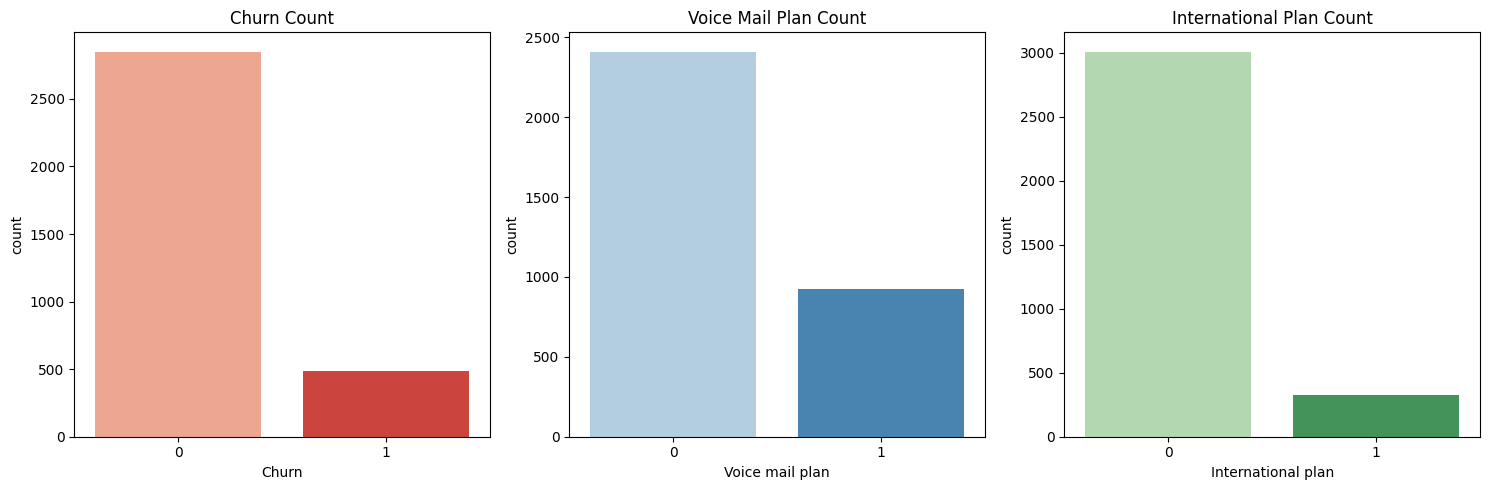

In [38]:
import seaborn as sb
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Figure 'Churn'
sb.countplot(x='Churn', data=data, palette='Reds', ax=axes[0])
axes[0].set_title('Churn Count')

# Figure 'Voice mail plan'
sb.countplot(x='Voice mail plan', data=data, palette='Blues', ax=axes[1])
axes[1].set_title('Voice Mail Plan Count')

# Figure 'International plan'
sb.countplot(x='International plan', data=data, palette='Greens', ax=axes[2])
axes[2].set_title('International Plan Count')
plt.tight_layout()
plt.show()

## IV. Feature Selection :
### 1/ Etude de la corrélation entre les Features

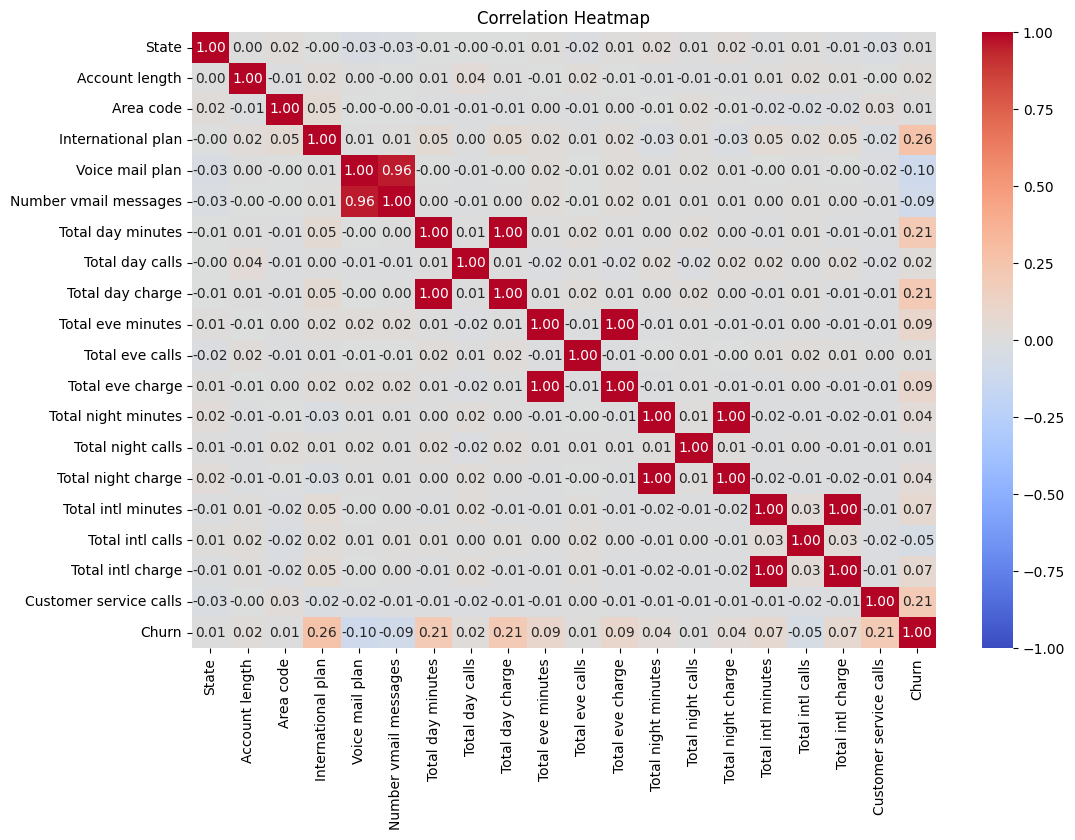

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

### D'après cette Heatmap on peut sous-tirer quelques interprétations :
#### 1. Des colonnes hautement corrélées :
Les variables comme **'Total day minutes'** et **'Total day charge'** étant parfaitement corrélées, l'une d'entre elles pourrait être supprimée pour éviter la multicolinéarité.
#### 2. Les variables pértinentes pour prédire 'Churn' :
 - **'International plan' et 'Churn' :** corrélation modérée positive de **0.26**.  
&#8594; Cela suggère que les clients ayant un plan international sont légèrement plus susceptibles de résilier leur abonnement.
 - **'Customer service calls' et 'Churn' :** Corrélation positive de **0.21**.  
&#8594; Cela indique que les clients qui appellent plus souvent le service client ont une probabilité plus élevée de résilier (ce qui peut refléter de l'insatisfaction).
#### 3. Corrélations faibles ou négligeables :
**'Account length'**, **'Area code'**, et autres colonnes comme **'State'** :
Ces colonnes n'ont presque aucune corrélation significative **(Coloré en gris)** avec les autres variables ou avec Churn.
Cela peut signifier qu'elles n'ont pas d'impact notable sur les comportements ou les tendances des données.

### 2/ Feature selection avec Chi-Square :

In [40]:
from sklearn.feature_selection import SelectKBest, chi2
X = features
y = target
chi2_selector = SelectKBest(chi2, k='all')
chi2_selector.fit(X, y)
scores = chi2_selector.scores_
p_values = chi2_selector.pvalues_
results_df = pd.DataFrame({
    'Feature': X.columns,
    'Chi2_Score': scores,
    'p_value': p_values
})

significant_features = results_df[results_df['p_value'] < 0.05]
print("Caractéristiques sélectionnées avec p-value < 0.05 :")
print(significant_features)
num_significant_features = significant_features.shape[0]

print(f"Nombre de features sélectionnées avec p-value < 0.05 : {num_significant_features}/20")
selected_features = significant_features['Feature'].values
print(selected_features)

Caractéristiques sélectionnées avec p-value < 0.05 :
                   Feature   Chi2_Score        p_value
1           Account length    14.304197   1.555178e-04
3       International plan   203.244178   4.091735e-46
4          Voice mail plan    25.156959   5.284860e-07
5    Number vmail messages   620.628799  5.457527e-137
6        Total day minutes  2314.169315   0.000000e+00
7          Total day calls     4.553059   3.286000e-02
8         Total day charge   393.399658   1.505830e-87
9        Total eve minutes   367.164781   7.753815e-82
11        Total eve charge    31.201931   2.325347e-08
12     Total night minutes    53.446506   2.657310e-13
15      Total intl minutes    11.813081   5.881601e-04
16        Total intl calls    12.582769   3.893194e-04
18  Customer service calls   160.773588   7.667100e-37
Nombre de features sélectionnées avec p-value < 0.05 : 13/20
['Account length' 'International plan' 'Voice mail plan'
 'Number vmail messages' 'Total day minutes' 'Total day cal

In [41]:
chosen_features = significant_features.Feature.tolist()

## V. Partie Entrainnement :

### 1. LogisticRegression :

Précision après ajustement de seuil : 79.01%

Rapport de classification avec seuil ajusté :
              precision    recall  f1-score   support

    Classe 0       0.95      0.80      0.87       571
    Classe 1       0.38      0.76      0.51        96

    accuracy                           0.79       667
   macro avg       0.67      0.78      0.69       667
weighted avg       0.87      0.79      0.82       667



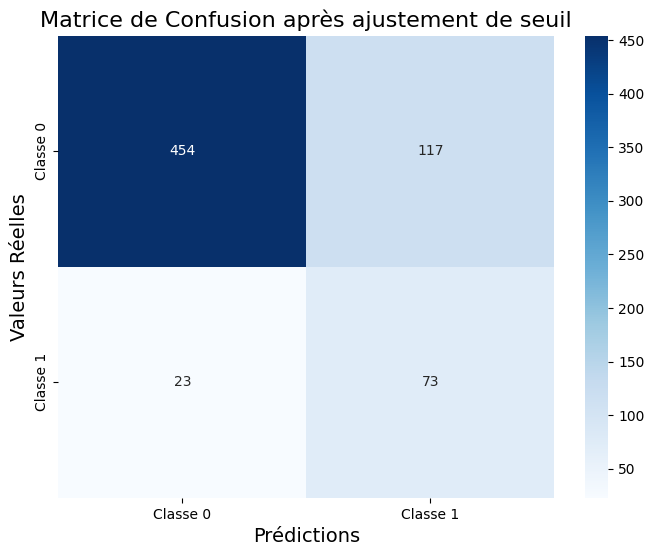

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
X_selected = X[selected_features] 
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Normaliser les données 
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test) 


logreg_model = LogisticRegression(max_iter=1000, random_state=42, class_weight={0: 1, 1: 5}) 
logreg_model.fit(X_train, y_train) 


y_prob = logreg_model.predict_proba(X_test)[:, 1]  


threshold = 0.5  
y_pred_adjusted = (y_prob >= threshold).astype(int)  
# Évaluer les performances du modèle
accuracy_adjusted = accuracy_score(y_test, y_pred_adjusted)  
print(f"Précision après ajustement de seuil : {accuracy_adjusted * 100:.2f}%")


print("\nRapport de classification avec seuil ajusté :")
print(classification_report(y_test, y_pred_adjusted, target_names=["Classe 0", "Classe 1"]))


conf_matrix = confusion_matrix(y_test, y_pred_adjusted)  
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Classe 0", "Classe 1"], yticklabels=["Classe 0", "Classe 1"])
plt.title("Matrice de Confusion après ajustement de seuil", fontsize=16)
plt.xlabel("Prédictions", fontsize=14)
plt.ylabel("Valeurs Réelles", fontsize=14)
plt.show()


## 2.Decision Tree :


Meilleurs hyperparamètres : {'class_weight': None, 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}
Précision (Decision Tree) : 93.85%

Rapport de classification :
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       571
           1       0.82      0.74      0.78        96

    accuracy                           0.94       667
   macro avg       0.89      0.86      0.87       667
weighted avg       0.94      0.94      0.94       667



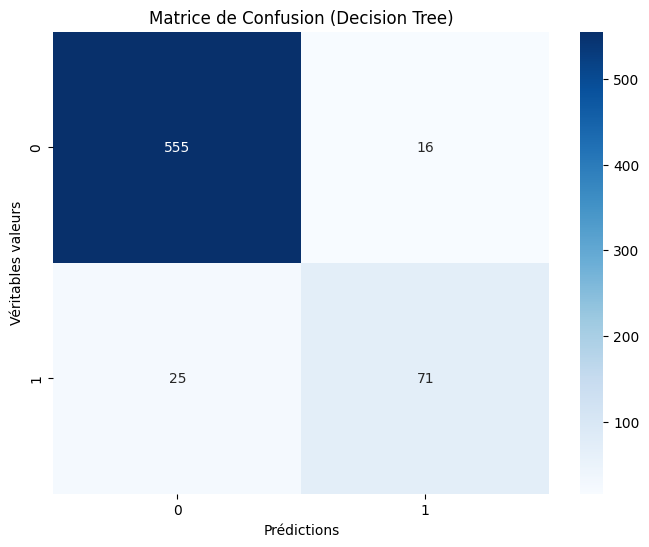

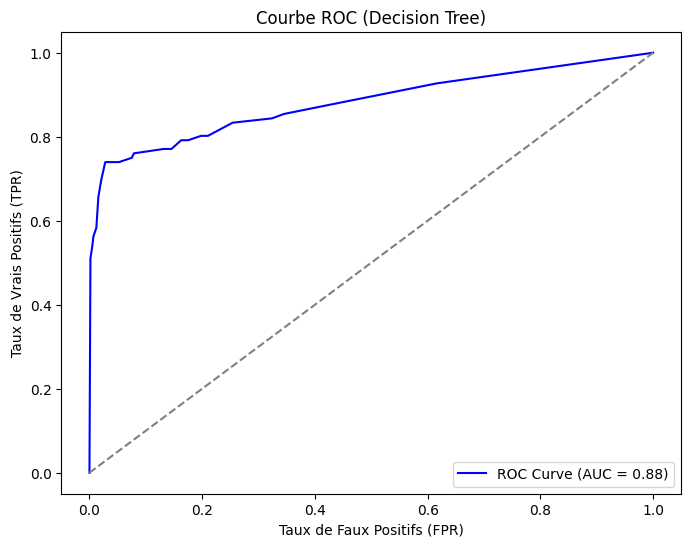

Score AUC (Decision Tree) : 0.88
Scores de validation croisée : [0.92696629 0.94183865 0.9380863  0.93433396 0.94934334]
Moyenne des scores de validation croisée : 93.81%


In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, roc_curve, auc, 
    precision_recall_curve, average_precision_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#  L'entraînement
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'class_weight': [None, 'balanced']  
}

grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,  
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(f"Meilleurs hyperparamètres : {best_params}")

# Entraîner le modèle avec les meilleurs hyperparamètres
dt_model = DecisionTreeClassifier(**best_params, random_state=42)
dt_model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = dt_model.predict(X_test)
y_proba = dt_model.predict_proba(X_test)[:, 1]

# Évaluer la précision
accuracy_dt = accuracy_score(y_test, y_pred)
print(f"Précision (Decision Tree) : {accuracy_dt * 100:.2f}%")
classification_report_dt=classification_report(y_test, y_pred)

print("\nRapport de classification :")
print(classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.title("Matrice de Confusion (Decision Tree)")
plt.xlabel("Prédictions")
plt.ylabel("Véritables valeurs")
plt.show()


fpr, tpr, _ = roc_curve(y_test, y_proba)
auc_dt = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_dt:.2f})", color="blue")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  
plt.xlabel("Taux de Faux Positifs (FPR)")
plt.ylabel("Taux de Vrais Positifs (TPR)")
plt.title("Courbe ROC (Decision Tree)")
plt.legend(loc="lower right")
plt.show()
print(f"Score AUC (Decision Tree) : {auc_dt:.2f}")

cross_val_scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Scores de validation croisée : {cross_val_scores}")
print(f"Moyenne des scores de validation croisée : {np.mean(cross_val_scores) * 100:.2f}%")

#### Arbre de décision :

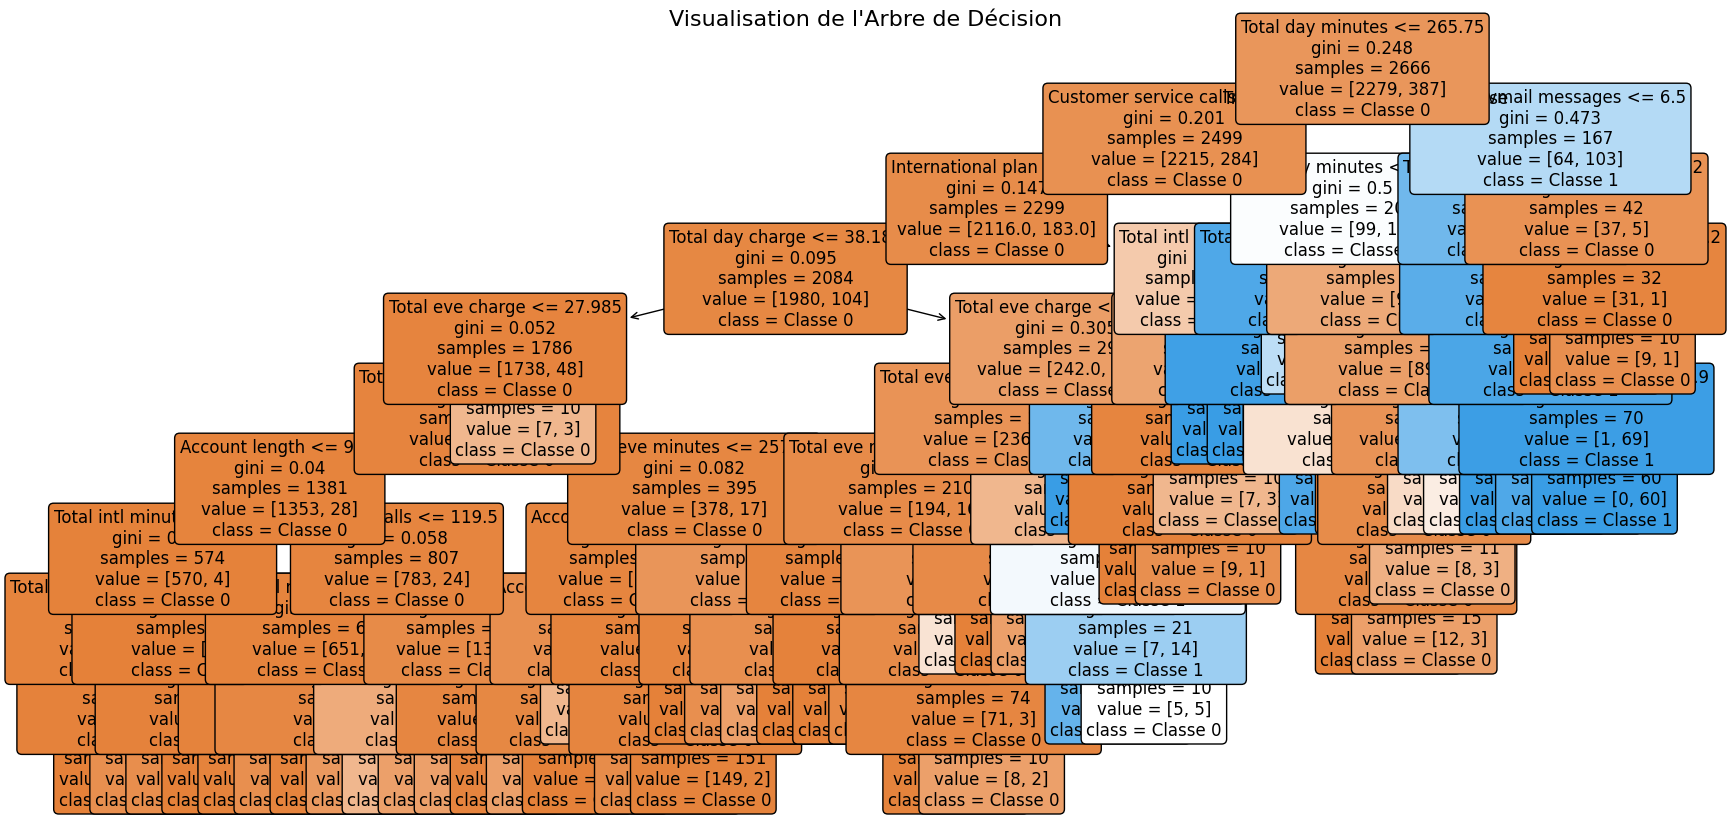

In [44]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(
    dt_model, 
    feature_names=X_selected.columns.tolist(), 
    class_names=["Classe 0", "Classe 1"],  
    filled=True, 
    rounded=True,
    fontsize=12
)
plt.title("Visualisation de l'Arbre de Décision", fontsize=16)
plt.show()


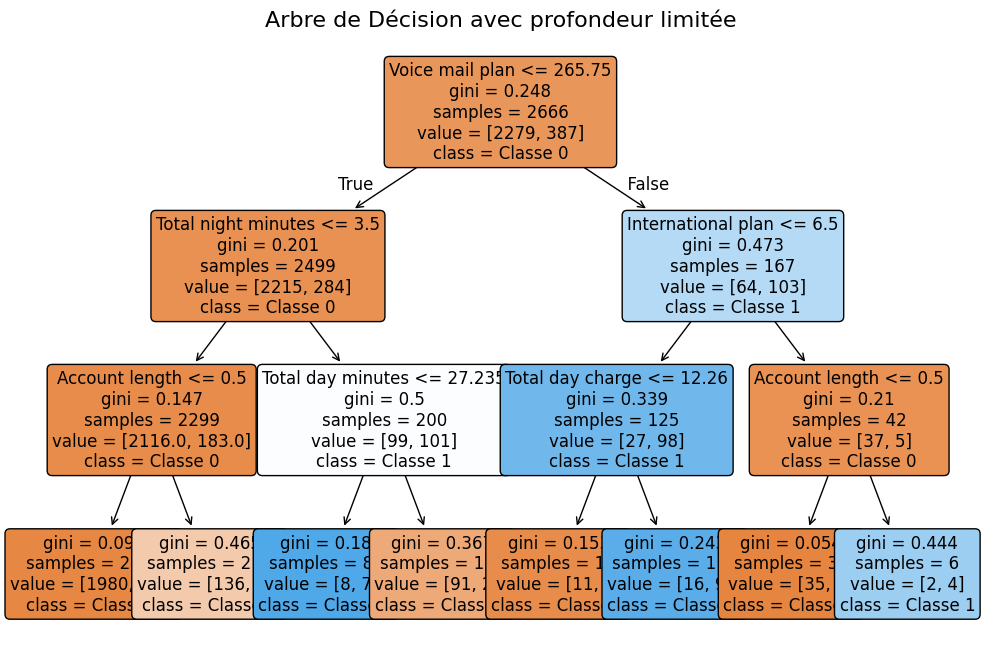

In [45]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
dt_model_limited = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model_limited.fit(X_train, y_train)


plt.figure(figsize=(12, 8))
plot_tree(
    dt_model_limited, 
    feature_names=X.columns.tolist(), 
    class_names=["Classe 0", "Classe 1"], 
    filled=True, 
    rounded=True, 
    fontsize=12
)
plt.title("Arbre de Décision avec profondeur limitée", fontsize=16)
plt.show()

#### Importance des Caractéristiques de Decision Tree :

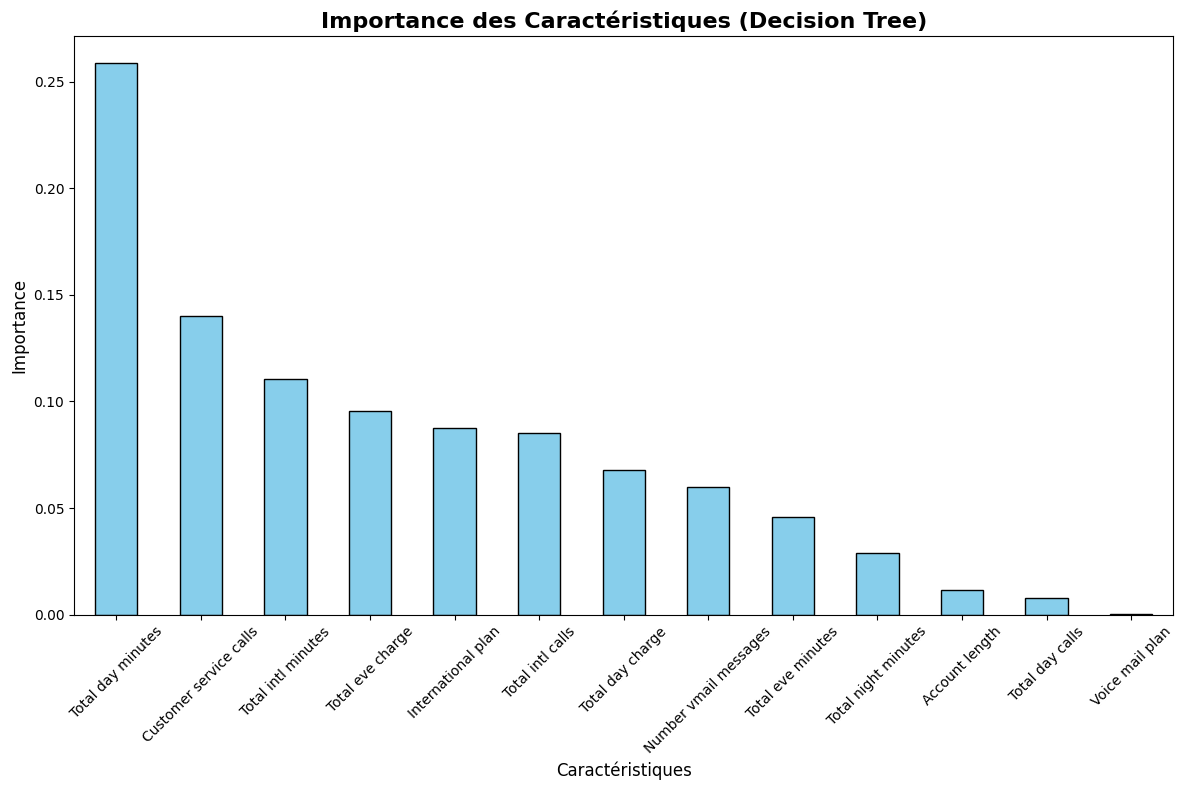

In [46]:
importances = pd.Series(dt_model.feature_importances_, index=chosen_features)


importances = importances.sort_values(ascending=False)


importances = importances[importances > 0]


plt.figure(figsize=(12, 8))
importances.plot(kind='bar', color='skyblue', edgecolor='black')


plt.title("Importance des Caractéristiques (Decision Tree)", fontsize=16, fontweight='bold')
plt.xlabel("Caractéristiques", fontsize=12)
plt.ylabel("Importance", fontsize=12)


plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)


plt.tight_layout()
plt.show()


###  3. Algorithme KNN :

Distribution des classes avant SMOTE : Counter({0: 2279, 1: 387})
Distribution des classes après SMOTE : Counter({0: 2279, 1: 2279})

Précision KNN : 81.11%

Rapport de classification KNN :
              precision    recall  f1-score   support

           0       0.96      0.81      0.88       571
           1       0.42      0.82      0.56        96

    accuracy                           0.81       667
   macro avg       0.69      0.82      0.72       667
weighted avg       0.89      0.81      0.83       667



c:\Users\ROYAUME MEDIAS\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\ROYAUME MEDIAS\anaconda3\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


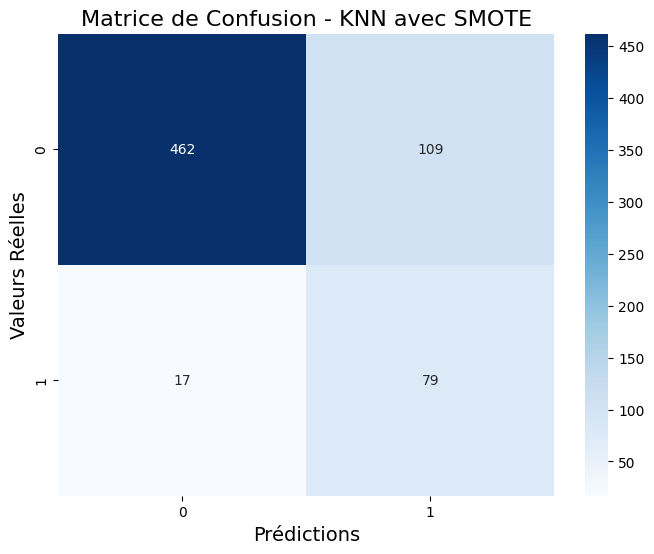

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, average_precision_score, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


X = features
y = target
X_selected = X[selected_features]
scaler = StandardScaler()
X_selected_scaled = scaler.fit_transform(X_selected)


X_train, X_test, y_train, y_test = train_test_split(X_selected_scaled, y, test_size=0.2, random_state=42)


smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Vérifier la distribution des classes avant et après SMOTE
print("Distribution des classes avant SMOTE :", Counter(y_train))
print("Distribution des classes après SMOTE :", Counter(y_train_res))


knn_model = KNeighborsClassifier(n_neighbors=7, weights='uniform') 
knn_model.fit(X_train_res, y_train_res)


y_pred_knn = knn_model.predict(X_test)

# Évaluation du modèle KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"\nPrécision KNN : {accuracy_knn * 100:.2f}%")
print("\nRapport de classification KNN :")
print(classification_report(y_test, y_pred_knn))

# Visualisation de la matrice de confusion
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.title("Matrice de Confusion - KNN avec SMOTE", fontsize=16)
plt.xlabel("Prédictions", fontsize=14)
plt.ylabel("Valeurs Réelles", fontsize=14)
plt.show()


#### KNN Score :

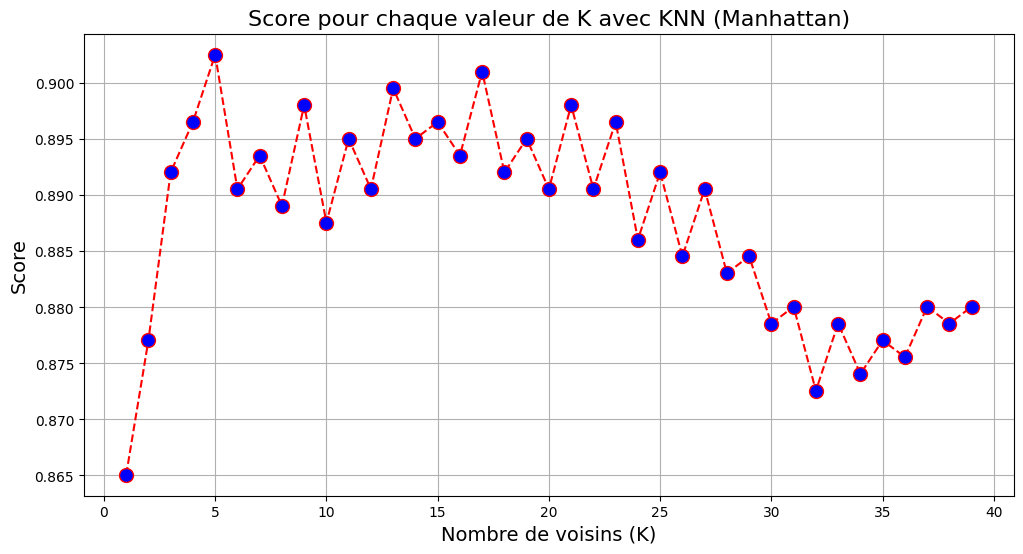

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

XX = features[selected_features] 
y = target  


X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size=0.2, random_state=42)


scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  
# Liste pour stocker les scores
score = []


for i in range(1, 40): 
    knn = KNeighborsClassifier(n_neighbors=i, metric='manhattan')
    knn_model = knn.fit(X_train, y_train)  
    score.append(knn_model.score(X_test, y_test)) 

# Visualisation
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), score, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Score pour chaque valeur de K avec KNN (Manhattan)', fontsize=16)
plt.xlabel('Nombre de voisins (K)', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.grid(axis='both')
plt.show()
print ()

### 4. SVM :

c:\Users\ROYAUME MEDIAS\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\ROYAUME MEDIAS\anaconda3\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Précision  : 83.36%

Rapport de classification  :
              precision    recall  f1-score   support

    Classe 0       0.96      0.84      0.90       571
    Classe 1       0.46      0.81      0.58        96

    accuracy                           0.83       667
   macro avg       0.71      0.82      0.74       667
weighted avg       0.89      0.83      0.85       667



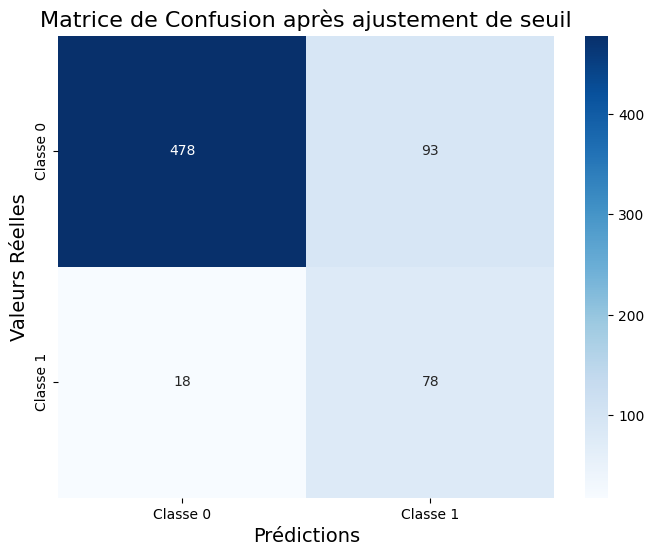

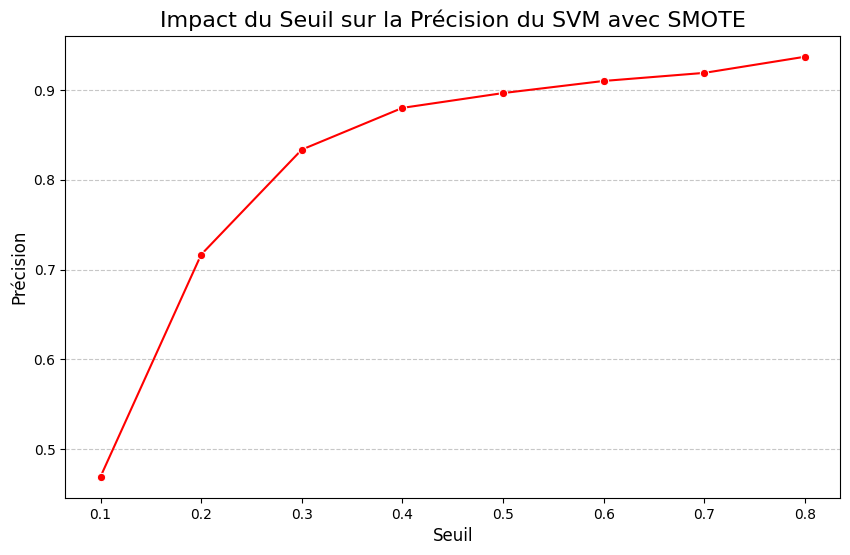

In [49]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


scaler = MinMaxScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)  
X_test = scaler.transform(X_test)  

param_grid = {
    'C': [0.1, 1, 10], 
    'gamma': ['scale', 'auto'],  
    'kernel': ['rbf']  
}

grid_search = GridSearchCV(SVC(probability=True, random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

svm_model = grid_search.best_estimator_


y_prob = svm_model.predict_proba(X_test)[:, 1]  


threshold = 0.3
y_pred_adjusted = (y_prob >= threshold).astype(int)


accuracy_adjusted = accuracy_score(y_test, y_pred_adjusted) 
print(f"Précision  : {accuracy_adjusted * 100:.2f}%")


print("\nRapport de classification  :")
print(classification_report(y_test, y_pred_adjusted, target_names=["Classe 0", "Classe 1"]))


conf_matrix = confusion_matrix(y_test, y_pred_adjusted)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Classe 0", "Classe 1"], yticklabels=["Classe 0", "Classe 1"])
plt.title("Matrice de Confusion après ajustement de seuil", fontsize=16)
plt.xlabel("Prédictions", fontsize=14)
plt.ylabel("Valeurs Réelles", fontsize=14)
plt.show()

# Visualiser les performances 
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
accuracy_scores = []

for t in thresholds:
    y_pred_temp = (y_prob >= t).astype(int)
    acc = accuracy_score(y_test, y_pred_temp)
    accuracy_scores.append(acc)

# Visualiser l'impact du seuil sur la précision
plt.figure(figsize=(10, 6))
sns.lineplot(x=thresholds, y=accuracy_scores, marker='o', color='red')
plt.title("Impact du Seuil sur la Précision du SVM avec SMOTE", fontsize=16)
plt.xlabel("Seuil", fontsize=12)
plt.ylabel("Précision", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## VI. Méthodes ensemblistes :

### 1. AdaBoosting :

c:\Users\ROYAUME MEDIAS\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\ROYAUME MEDIAS\anaconda3\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Précision avec AdaBoostClassifier : 91.75%

Rapport de classification :
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       571
           1       0.69      0.78      0.73        96

    accuracy                           0.92       667
   macro avg       0.83      0.86      0.84       667
weighted avg       0.92      0.92      0.92       667



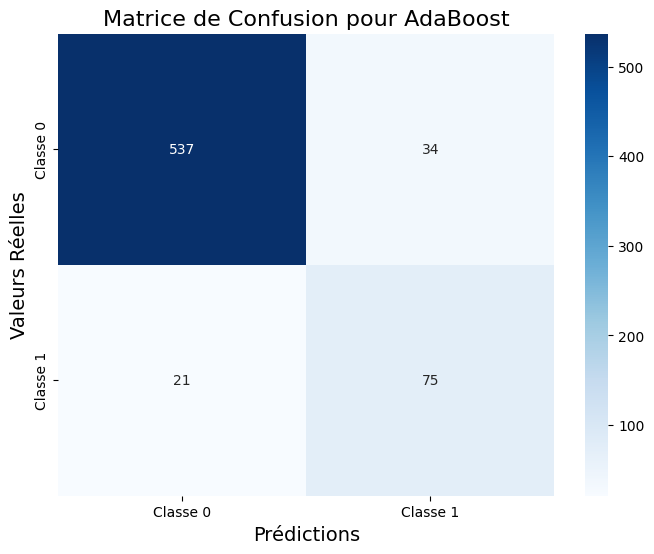

Liste des caractéristiques sélectionnées :
Index(['Account length', 'International plan', 'Voice mail plan',
       'Number vmail messages', 'Total day minutes', 'Total day calls',
       'Total day charge', 'Total eve minutes', 'Total eve charge',
       'Total night minutes', 'Total intl minutes', 'Total intl calls',
       'Customer service calls'],
      dtype='object')


In [50]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, average_precision_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import joblib

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


smote = SMOTE(random_state=42, k_neighbors=5) 
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


weak_learner = DecisionTreeClassifier(max_depth=3, random_state=42) 


model_ABC = AdaBoostClassifier(estimator=weak_learner, n_estimators=200, learning_rate=0.1, random_state=42) 
model_ABC.fit(X_train_res, y_train_res)


y_pred_ABC = model_ABC.predict(X_test)
y_pred_prob_ABC = model_ABC.predict_proba(X_test)[:, 1]


accuracy_ABC = accuracy_score(y_test, y_pred_ABC)


roc_score_ABC = roc_auc_score(y_test, y_pred_prob_ABC)


classification_report_ABC=classification_report(y_test, y_pred_ABC)
print(f"Précision avec AdaBoostClassifier : {accuracy_ABC * 100:.2f}%")
print("\nRapport de classification :")
print(classification_report(y_test, y_pred_ABC))


conf_matrix_ABC = confusion_matrix(y_test, y_pred_ABC)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ABC, annot=True, fmt="d", cmap="Blues", xticklabels=["Classe 0", "Classe 1"], yticklabels=["Classe 0", "Classe 1"])
plt.title("Matrice de Confusion pour AdaBoost", fontsize=16)
plt.xlabel("Prédictions", fontsize=14)
plt.ylabel("Valeurs Réelles", fontsize=14)
plt.show()

# Afficher les caractéristiques sélectionnées
print("Liste des caractéristiques sélectionnées :")
print(X_selected.columns)



## 2. Random Forest algorithme :

c:\Users\ROYAUME MEDIAS\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\ROYAUME MEDIAS\anaconda3\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Précision  : 94.75%

Rapport de classification :
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       571
           1       0.81      0.82      0.82        96

    accuracy                           0.95       667
   macro avg       0.89      0.90      0.89       667
weighted avg       0.95      0.95      0.95       667



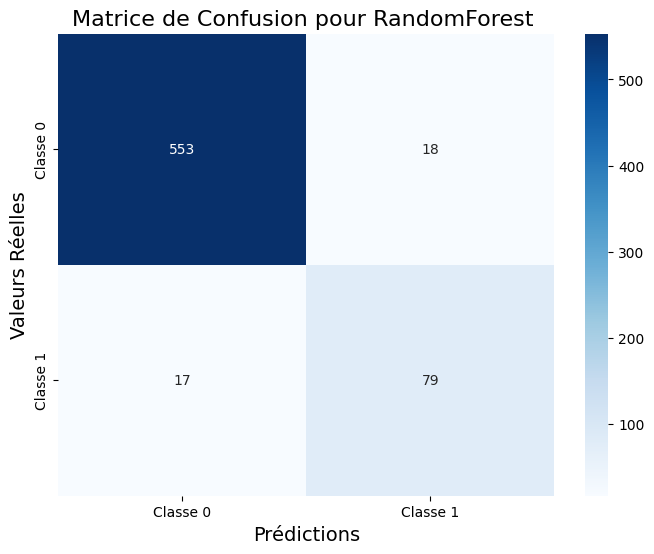

Liste des caractéristiques sélectionnées :
Index(['Account length', 'International plan', 'Voice mail plan',
       'Number vmail messages', 'Total day minutes', 'Total day calls',
       'Total day charge', 'Total eve minutes', 'Total eve charge',
       'Total night minutes', 'Total intl minutes', 'Total intl calls',
       'Customer service calls'],
      dtype='object')


In [51]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve, average_precision_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE


X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train_res, y_train_res)


y_pred = rf_model.predict(X_test)


accuracy_rf = accuracy_score(y_test, y_pred)
print(f"Précision  : {accuracy_rf * 100:.2f}%")


class_report_rf = classification_report(y_test, y_pred, output_dict=True)
print("\nRapport de classification :")
print(classification_report(y_test, y_pred))


conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Classe 0", "Classe 1"], yticklabels=["Classe 0", "Classe 1"])
plt.title("Matrice de Confusion pour RandomForest ", fontsize=16)
plt.xlabel("Prédictions", fontsize=14)
plt.ylabel("Valeurs Réelles", fontsize=14)
plt.show()


print("Liste des caractéristiques sélectionnées :")
print(X_selected.columns)





### Importance des features

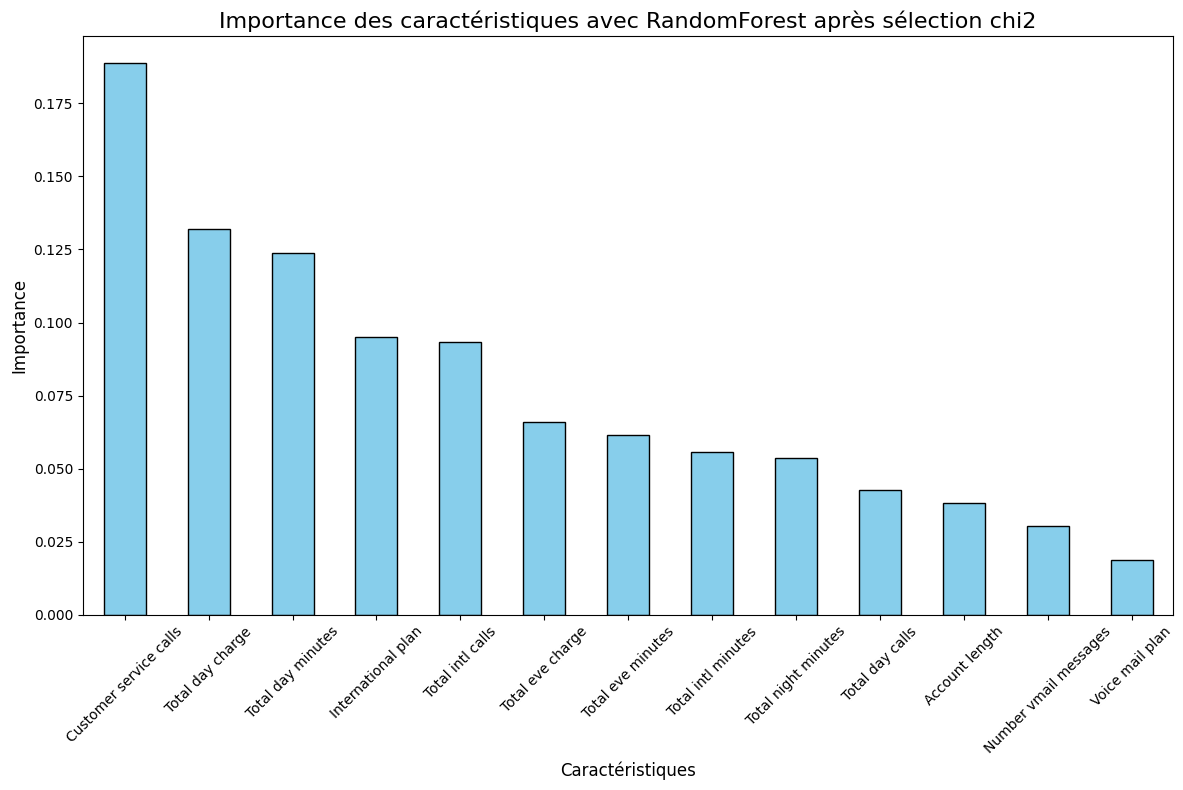

In [52]:

feature_importances = pd.Series(rf_model.feature_importances_, index=selected_features)
feature_importances = feature_importances.sort_values(ascending=False)


plt.figure(figsize=(12, 8))
feature_importances.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Importance des caractéristiques avec RandomForest après sélection chi2", fontsize=16)
plt.xlabel("Caractéristiques", fontsize=12)
plt.ylabel("Importance", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()


#### Courbe ROC :

Score AUC : 91.21%


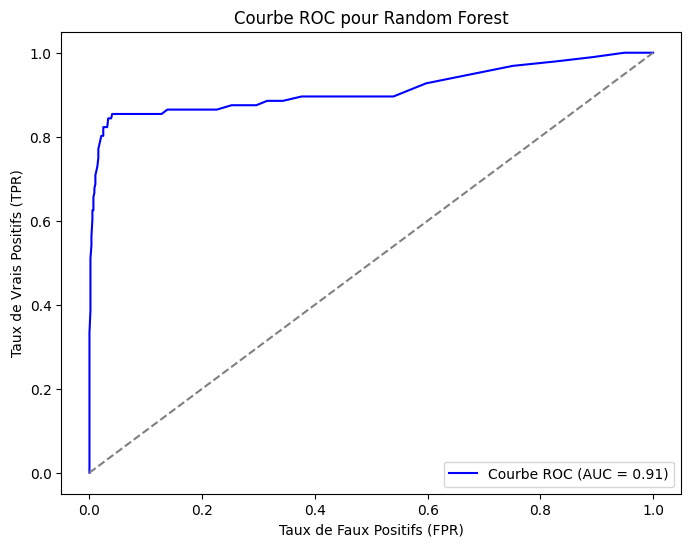

In [53]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_probs = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)


roc_auc = auc(fpr, tpr)
print(f"Score AUC : {roc_auc * 100:.2f}%")

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Courbe ROC pour Random Forest')
plt.legend(loc='lower right')
plt.show()


### Les cas mal classifiés

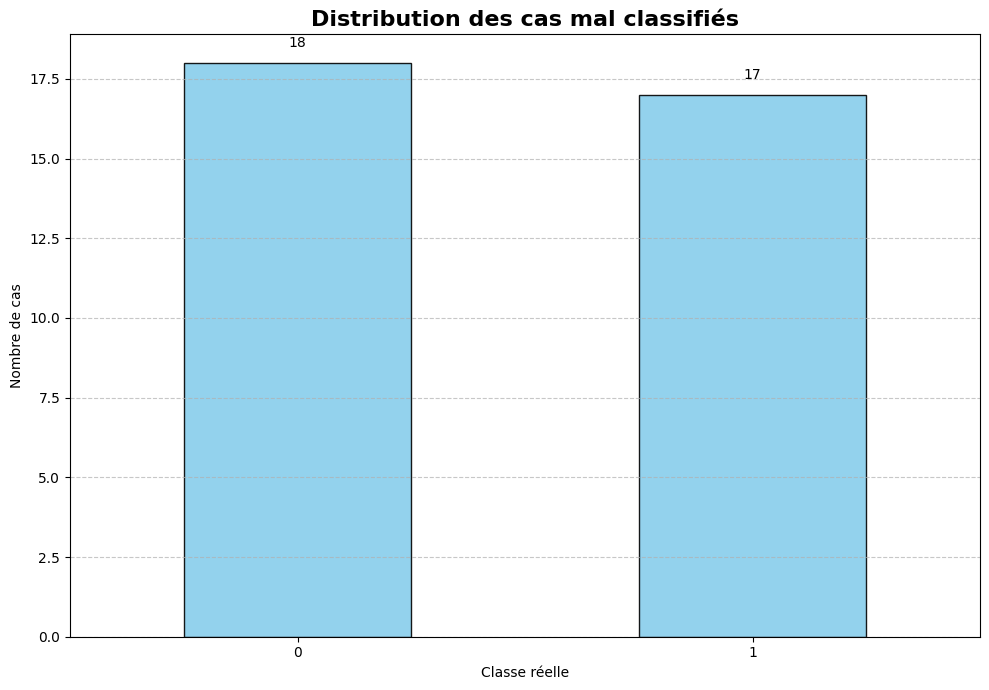

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

y_prob = rf_model.predict_proba(X_test)[:, 1]


y_pred_binary = (y_prob >= 0.5).astype(int)


misclassified = pd.DataFrame({"y_test": y_test, "y_pred": y_pred_binary})
misclassified = misclassified[misclassified["y_test"] != misclassified["y_pred"]]


misclassified_counts = misclassified["y_test"].value_counts()


plt.figure(figsize=(10, 7))


misclassified_counts.plot(
    kind='bar',
    color='skyblue',
    edgecolor='black',
    alpha=0.9
)


plt.title("Distribution des cas mal classifiés", fontsize=16, fontweight='bold')
plt.xlabel("Classe réelle", fontsize=10)
plt.ylabel("Nombre de cas", fontsize=10)


for i, v in enumerate(misclassified_counts):
    plt.text(i, v + 0.5, str(v), ha='center', fontsize=10)


plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()


## 3. XGboost algorithme :

In [55]:
# pip install xgboost

c:\Users\ROYAUME MEDIAS\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\ROYAUME MEDIAS\anaconda3\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTEENN or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
c:\Users\ROYAUME MEDIAS\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be remov

Précision avec XGBoost  : 92.05%

Rapport de classification :
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       571
           1       0.68      0.83      0.75        96

    accuracy                           0.92       667
   macro avg       0.83      0.88      0.85       667
weighted avg       0.93      0.92      0.92       667



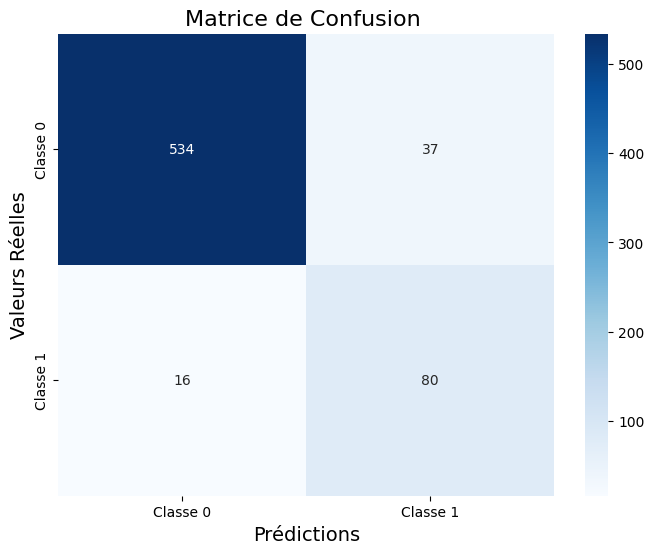

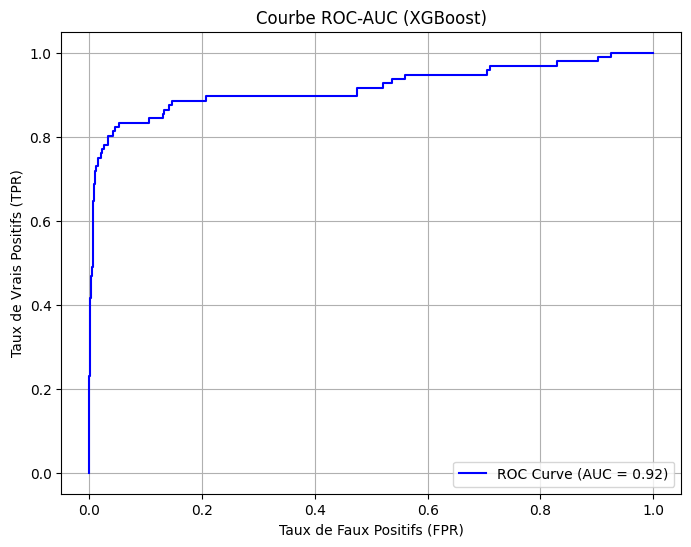

Score AUC (ROC-AUC) : 91.61%


In [56]:
import xgboost as xgb
from imblearn.combine import SMOTEENN
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


smoteenn = SMOTEENN(random_state=42)
X_train_res, y_train_res = smoteenn.fit_resample(X_train, y_train)


xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    random_state=42,
    scale_pos_weight=len(y_train) / (2 * sum(y_train == 1)), 
    use_label_encoder=False,
    eval_metric="logloss"
)
xgb_model.fit(X_train_res, y_train_res)


y_pred_xgb = xgb_model.predict(X_test)


accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Précision avec XGBoost  : {accuracy_xgb * 100:.2f}%")


print("\nRapport de classification :")
print(classification_report(y_test, y_pred_xgb))


conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Blues", xticklabels=["Classe 0", "Classe 1"], yticklabels=["Classe 0", "Classe 1"])
plt.title("Matrice de Confusion ", fontsize=16)
plt.xlabel("Prédictions", fontsize=14)
plt.ylabel("Valeurs Réelles", fontsize=14)
plt.show()

y_proba_Xgb = xgb_model.predict_proba(X_test)[:, 1] 


precision_Xgb, recall_Xgb, _ = precision_recall_curve(y_test, y_proba_Xgb)
avg_precision_Xgb = average_precision_score(y_test, y_proba_Xgb)
fpr_Xgb, tpr_Xgb, _ = roc_curve(y_test, y_proba_Xgb)
roc_auc_Xgb = auc(fpr_Xgb, tpr_Xgb)


plt.figure(figsize=(8, 6))
plt.plot(fpr_Xgb, tpr_Xgb, label=f"ROC Curve (AUC = {roc_auc_Xgb:.2f})", color="blue")
plt.xlabel("Taux de Faux Positifs (FPR)")
plt.ylabel("Taux de Vrais Positifs (TPR)")
plt.title("Courbe ROC-AUC (XGBoost)")
plt.legend(loc="lower right")
plt.grid()
plt.show()

print(f"Score AUC (ROC-AUC) : {roc_auc_Xgb * 100:.2f}%")


### VII. Partie Test :

### Courbe Precision-Recall :


#### Pour Décision Tree:

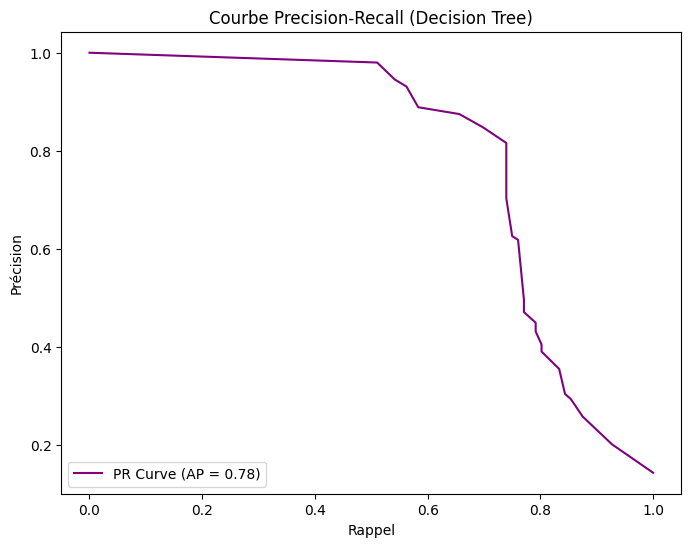

Score de précision moyenne (Average Precision Score) : 77.63%


In [57]:
precision, recall, _ = precision_recall_curve(y_test, y_proba)
avg_precision = average_precision_score(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"PR Curve (AP = {avg_precision:.2f})", color="purple")
plt.xlabel("Rappel")
plt.ylabel("Précision")
plt.title("Courbe Precision-Recall (Decision Tree)")
plt.legend(loc="lower left")
plt.show()
print(f"Score de précision moyenne (Average Precision Score) : {avg_precision * 100:.2f}%")


#### Pour KNN :


Précision moyenne (Average Precision) : 74.64%


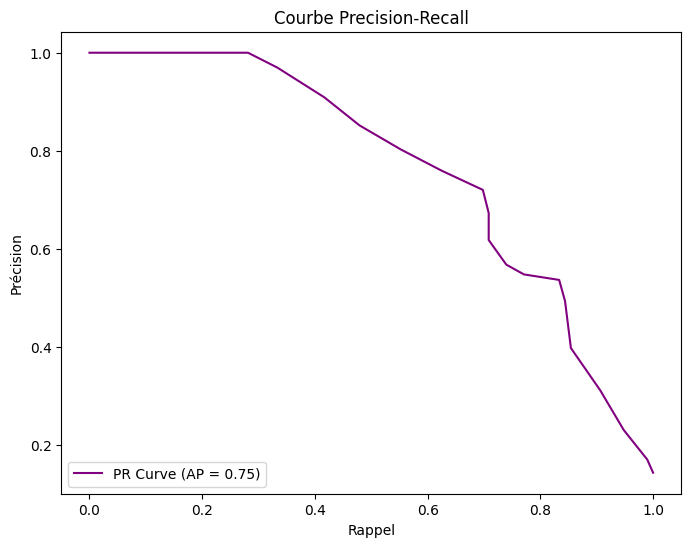

In [58]:
average_precision_knn = average_precision_score(y_test, knn_model.predict_proba(X_test)[:, 1])
print(f"\nPrécision moyenne (Average Precision) : {average_precision_knn * 100:.2f}%")

precision, recall, thresholds = precision_recall_curve(y_test, knn_model.predict_proba(X_test)[:, 1])
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_model.predict_proba(X_test)[:, 1])

roc_knn = auc(fpr_knn, tpr_knn)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"PR Curve (AP = {average_precision_knn:.2f})", color="purple")
plt.xlabel("Rappel")
plt.ylabel("Précision")
plt.title("Courbe Precision-Recall")
plt.legend(loc="lower left")
plt.show()



#### Pour Adaboosting:

Score de précision moyenne (Average Precision Score) : 79.59%


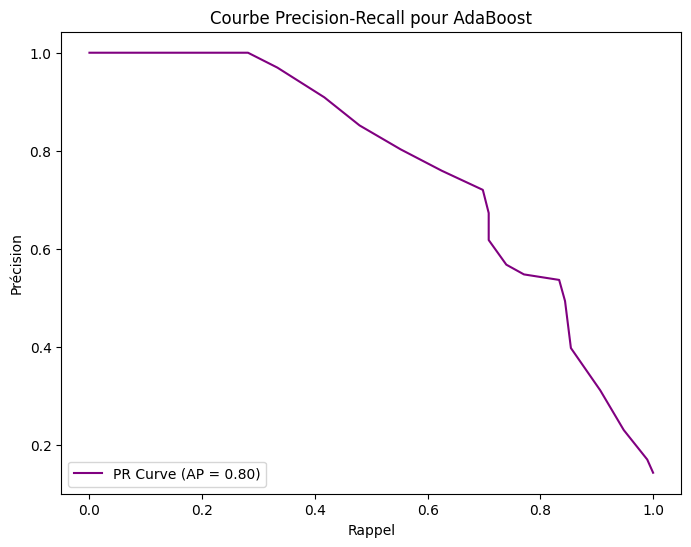

In [59]:
precision_adb, recall_adb, thresholds_adb = precision_recall_curve(y_test, y_pred_prob_ABC)

average_precision_adb = average_precision_score(y_test, y_pred_prob_ABC)
print(f"Score de précision moyenne (Average Precision Score) : {average_precision_adb * 100:.2f}%")


plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"PR Curve (AP = {average_precision_adb:.2f})", color="purple")
plt.xlabel("Rappel")
plt.ylabel("Précision")
plt.title("Courbe Precision-Recall pour AdaBoost")
plt.legend(loc="lower left")
plt.show()



#### Pour Random forest:

Score de précision moyenne (Average Precision Score) : 85.36%


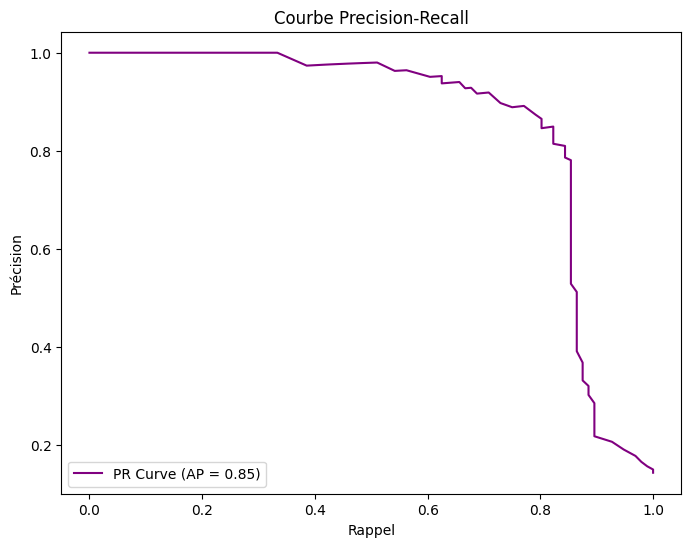

In [60]:

precision, recall, thresholds = precision_recall_curve(y_test, rf_model.predict_proba(X_test)[:, 1])

average_precision_random = average_precision_score(y_test, rf_model.predict_proba(X_test)[:, 1])
print(f"Score de précision moyenne (Average Precision Score) : {average_precision_random * 100:.2f}%")

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_score_rf = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"PR Curve (AP = {average_precision_random:.2f})", color="purple")
plt.xlabel("Rappel")
plt.ylabel("Précision")
plt.title("Courbe Precision-Recall")
plt.legend(loc="lower left")
plt.show()


#### Pour Xgboot:

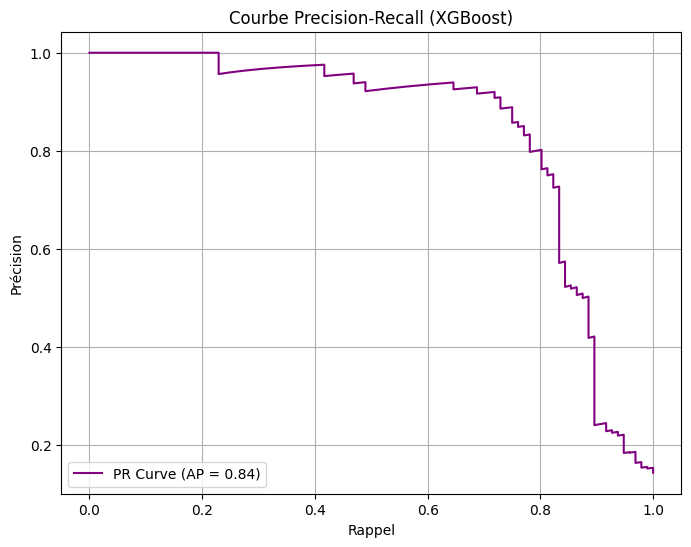

Score de précision moyenne (Average Precision Score) : 84.04%


In [61]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
plt.plot(recall_Xgb, precision_Xgb, label=f"PR Curve (AP = {avg_precision_Xgb:.2f})", color="purple")
plt.xlabel("Rappel")
plt.ylabel("Précision")
plt.title("Courbe Precision-Recall (XGBoost)")
plt.legend(loc="lower left")
plt.grid()
plt.show()

print(f"Score de précision moyenne (Average Precision Score) : {avg_precision_Xgb * 100:.2f}%")


In [62]:
print(f"Précision Random: {average_precision_random* 100:.2f}%")
print(f"Précision AdaBoostClassifier : {average_precision_adb * 100:.2f}%")
print(f"Précision KNN : {average_precision_knn * 100:.2f}%")
print(f"Précision DecisionTree : {avg_precision * 100:.2f}%")
print(f"Précision XGboost : {avg_precision_Xgb * 100:.2f}%")

Précision Random: 85.36%
Précision AdaBoostClassifier : 79.59%
Précision KNN : 74.64%
Précision DecisionTree : 77.63%
Précision XGboost : 84.04%



## VIII. Déploiement:

In [63]:
import joblib
joblib.dump(rf_model, 'model.pkl')
print("Le modèle a été enregistré sous 'model.pkl'")

Le modèle a été enregistré sous 'model.pkl'


In [64]:
model_prediction_churn = {
    "RandomForest": {
        "model": rf_model,
        "performance": {
            "accuracy": accuracy_rf,
            "roc_auc": roc_score_rf,
            "report": class_report_rf
        }
    },
   
    "adaBoosting": {
        "model": model_ABC,
        "performance": {
            "accuracy": accuracy_ABC,
            "roc_auc": roc_score_ABC,
            "report": classification_report_ABC
        }
    },
    
    "decisionTree": {
        "model": dt_model,
        "performance": {
            "accuracy": accuracy_dt,
            "roc_auc": auc_dt,
            "report": classification_report_dt
        },
        "selected_features": selected_features
    },

    "xgboost": {
        "model": xgb_model,
        "performance": {
            "accuracy": accuracy_xgb,
            "roc_auc": roc_auc_Xgb,
            "average_precision": avg_precision_Xgb,
            "report": classification_report(y_test, y_pred_xgb, output_dict=True)
        }
    }
}

joblib.dump(model_prediction_churn, "model.pkl")


['model.pkl']